In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df=pd.read_csv(r"C:\Users\HP\Desktop\Oasis internship\customer segmentation proj2 lvl1\ifood_df.csv")
print(df.head(10))

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   
5  62513.0        0         1       16       520         42               98   
6  55635.0        0         1       34       235         65              164   
7  33454.0        1         0       32        76         10               56   
8  30351.0        1         0       19        14          0               24   
9   5648.0        1         1       68        28          0                6   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88      

In [2]:
df.info()
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [4]:
print(df.describe())
if 'Purchase' in df.columns:
    avg_purchase_value = df['Purchase'].mean()
    print(f"Average Purchase Value: {avg_purchase_value:.2f}")

if 'CustomerID' in df.columns:
    purchase_frequency = df['CustomerID'].value_counts().mean()
    print(f"Average Purchase Frequency: {purchase_frequency:.2f}")

              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000 

In [5]:
# Select numerical columns for clustering
num_cols = df.select_dtypes(include=[np.number]).columns

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_cols])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_data)

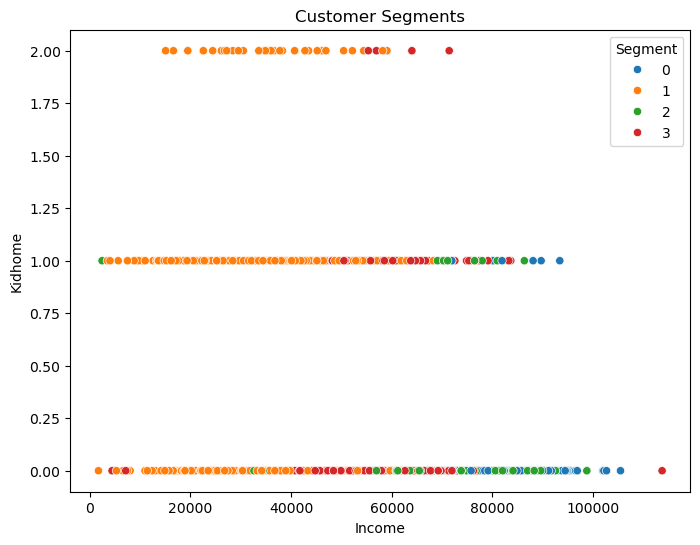

C:\Users\HP\AppData\Local\Temp\ipykernel_12296\3325907528.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=df, palette='tab10')


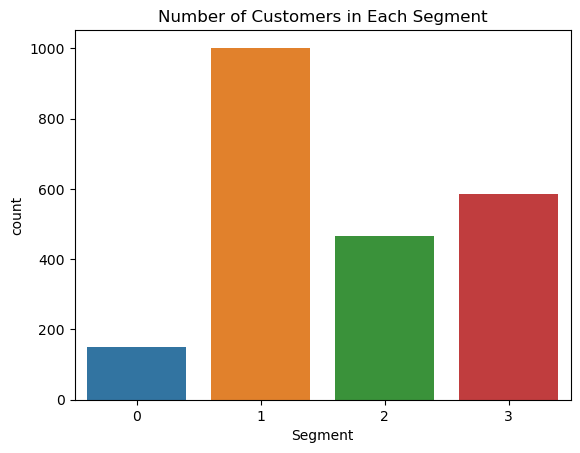

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=num_cols[0], 
    y=num_cols[1], 
    hue='Segment', 
    palette='tab10', 
    data=df
)
plt.title('Customer Segments')
plt.show()

# Count of customers per segment
sns.countplot(x='Segment', data=df, palette='tab10')
plt.title("Number of Customers in Each Segment")
plt.show()

In [7]:
segment_stats = df.groupby('Segment')[num_cols].mean()
print("\nAverage metrics per segment:")
print(segment_stats)

for seg in segment_stats.index:
    print(f"\nSegment {seg} Insights:")
    if segment_stats.loc[seg, num_cols[0]] > segment_stats[num_cols[0]].mean():
        print(f" - Higher than average {num_cols[0]}: Potential high-value customers.")
    else:
        print(f" - Lower than average {num_cols[0]}: May need targeted promotions.")


Average metrics per segment:
               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Segment                                                                       
0        81010.013423  0.060403  0.187919  48.449664  933.711409  51.442953   
1        33985.968064  0.803393  0.437126  49.212575   39.531936   4.987026   
2        73313.364026  0.042827  0.237687  50.370450  536.785867  71.895075   
3        57010.129472  0.240204  0.919932  47.720613  418.534923  20.412266   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Segment                                                                     
0             456.006711        76.073826         58.973154     76.483221   
1              22.804391         7.062874          5.120758     15.522954   
2             429.526767       104.074946         72.122056     77.220557   
3             124.580920        27.662692         20.816014     58.149915   

         ...  marital_Together  